In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer,KNNImputer,MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeClassifier
plt.style.use('ggplot')
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','SibSp'])

In [4]:
df

,Age,SibSp,Fare
0,22.0,1,7.2500
1,38.0,1,71.2833
2,26.0,0,NaN
3,35.0,1,NaN
4,35.0,0,8.0500
...,...,...,...
518,36.0,1,26.0000
519,32.0,0,7.8958
520,30.0,0,93.5000
521,22.0,0,7.8958


In [5]:

iterative_ = IterativeImputer()

In [6]:
x=df.drop(columns=['SibSp'])
y=df['SibSp']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
x_trnsa = iterative_.fit_transform(x)

In [9]:
x_trnsa

array([[22.        ,  7.25      ],
       [38.        , 71.2833    ],
       [26.        , 31.09877046],
       ...,
       [30.        , 93.5       ],
       [22.        ,  7.8958    ],
       [28.80748332,  7.225     ]], shape=(523, 2))

In [10]:
x =pd.DataFrame(x_trnsa,columns=x_train.columns)

In [11]:
x_train

,Age,Fare
222,51.0,8.0500
354,NaN,7.2250
422,29.0,7.8750
105,28.0,7.8958
28,NaN,7.8792
...,...,...
212,22.0,7.2500
249,54.0,26.0000
338,45.0,8.0500
214,NaN,7.7500


In [12]:
x

,Age,Fare
0,22.000000,7.250000
1,38.000000,71.283300
2,26.000000,31.098770
3,35.000000,33.128435
4,35.000000,8.050000
...,...,...
518,36.000000,26.000000
519,32.000000,7.895800
520,30.000000,93.500000
521,22.000000,7.895800


Text(0.5, 1.0, 'before')

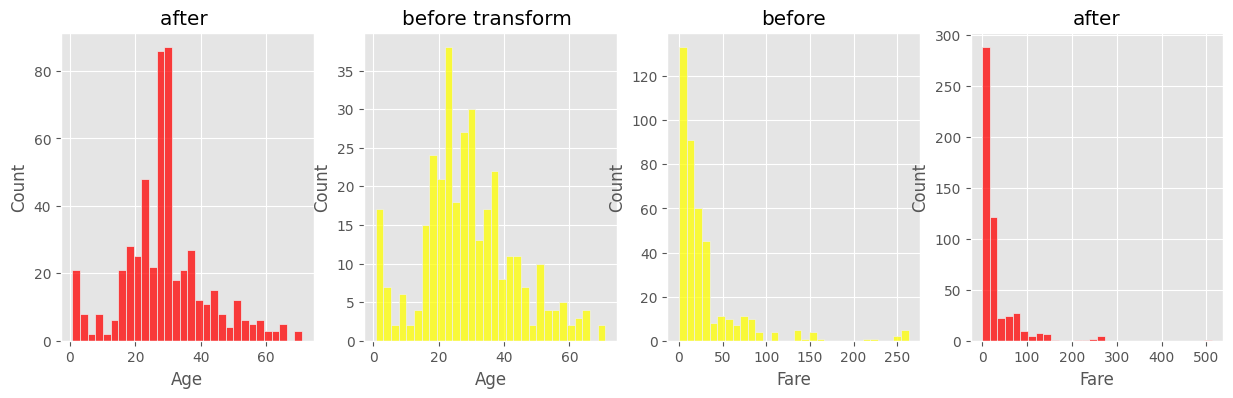

In [13]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(15,4))
sns.histplot(x['Age'],color='red',bins=30,ax=ax1)
ax1.set_title("after ")
sns.histplot(x_train['Age'],color='yellow',bins=30,ax=ax2)
ax2.set_title("before transform ")
sns.histplot(x['Fare'],color='red',bins=30,ax=ax4)
ax4.set_title('after')
sns.histplot(x_train['Fare'],color='yellow',bins=30,ax=ax3)
ax3.set_title("before")

<Axes: xlabel='Age', ylabel='count'>

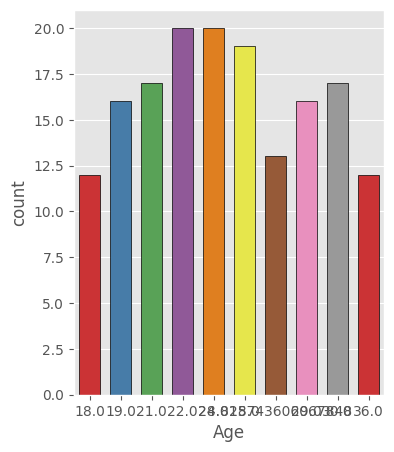

In [14]:
plt.figure(figsize=(4,5))
sns.barplot(x['Age'].value_counts().head(10),palette='Set1',width=0.7,edgecolor='black')

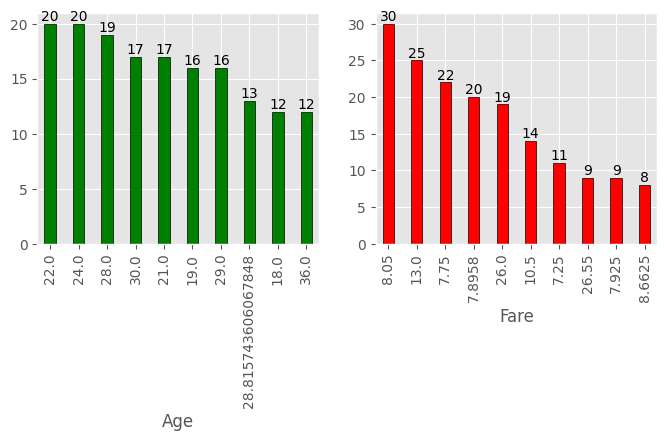

In [15]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(8,3))
x['Age'].value_counts().head(10).plot(kind='bar',width=0.4,color='green',ax=ax1 ,edgecolor='black' ,fontsize=10)
x['Fare'].value_counts().head(10).plot(kind='bar',width=0.4,color='red',ax=ax2  ,edgecolor='black' ,fontsize=10)

for container in ax1.containers:
    ax1.bar_label(container)

# Adding labels to bars in ax2
for container in ax2.containers:
    ax2.bar_label(container)

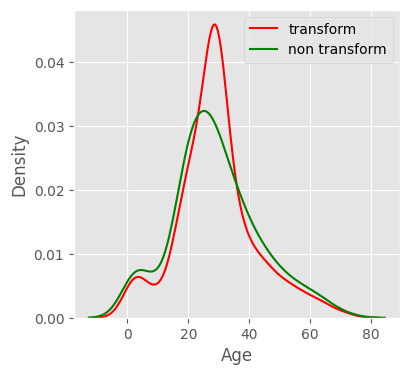

In [16]:
plt.figure(figsize=(4.2,4))
sns.distplot(x['Age'],hist=False,color='red',label='transform')
sns.distplot(x_train['Age'],hist=False,color='green',label='non transform')
plt.legend()

In [17]:
print("original variaence" ,x_train['Age'].var())
print("transformed varience ",x['Age'].var())

original variaence 204.96468426439236
transformed varience  165.42270354519064


#### kmean techniques using

### missing indicator

### automatically selecting value for imputation

In [18]:
df= pd.read_csv('titanic.csv')

In [19]:
df.drop(columns=['SibSp','Parch','Ticket','Cabin','Name'],inplace=True)

In [20]:
df


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,NaN,S
3,4,1,1,female,35.0,NaN,S
4,5,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...,...
518,519,1,2,female,36.0,26.0000,S
519,520,0,3,male,32.0,7.8958,S
520,521,1,1,female,30.0,93.5000,S
521,522,0,3,male,22.0,7.8958,S


In [21]:
x=df.drop(columns=['Survived'])
y=df['Survived']


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train.shape,x_test.shape

((418, 6), (105, 6))

In [24]:
y_train.shape,y_test.shape

((418,), (105,))

In [25]:
x_train

,PassengerId,Pclass,Sex,Age,Fare,Embarked
220,221,3,male,16.00,8.0500,S
69,70,3,male,26.00,8.6625,S
360,361,3,male,40.00,27.9000,S
305,306,1,male,0.92,151.5500,S
173,174,3,male,21.00,7.9250,S
...,...,...,...,...,...,...
71,72,3,female,16.00,46.9000,S
106,107,3,female,21.00,7.6500,S
270,271,1,male,NaN,31.0000,S
435,436,1,female,14.00,120.0000,S


In [26]:
numerical= ColumnTransformer([
    
    ('age',SimpleImputer(strategy='median'),[3]),
    ('fare',StandardScaler(),[1])
    
    
    ],remainder='passthrough')

In [43]:
catergory = ColumnTransformer(transformers=[
    

    ('ohe',OneHotEncoder(handle_unknown='ignore'),[2,5]),
  
   
    
    ],remainder='passthrough')

In [44]:
level3 = ColumnTransformer(
    
    [
        ('min',MinMaxScaler(),slice(0,10))
    ]
)

In [45]:
level4 = DecisionTreeClassifier()

In [46]:
clf =Pipeline([
    ('category',catergory),
    ('numerical',numerical),
    ('level3',level3),
    ('level4',level4)
    
])

In [47]:
clf.fit(x_train,y_train)

,steps,"[('category', ...), ('numerical', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ohe', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
